In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import numpy as np
import os
import csv
import math
from scipy import stats, optimize, interpolate
import scipy

In [113]:
startingDir = 'outputDataset'
startingDirRust = 'outputDatasetRust'
printFlag = True
errorsFlag = False
bobsNumberTestData = {}

In [114]:
def confInt(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round((m-h), 2), round((m+h), 2)


def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x, y)

def printResults(data):
    print('Test ' + str(data['bobsNumber']) + ' bobs, Thr ' + str(data['thresholdNumber']) +
        ':\t requestAccess avg=' + str(round(np.mean(data['requestAccess']), 2)) +
        'ms,confint=' + str(confInt(data['requestAccess'])) +
        'ms,\t grantAccess avg=' + str(round(np.mean(data['grantAccess']), 2)) +
        'ms,confint=' + str(confInt(data['grantAccess'])) +
        'ms,\t createKfrags avg=' + str(round(np.mean(data['createKfrags']), 2)) +
        'ms,confint=' + str(confInt(data['createKfrags'])) +
        'ms,\t getCfrags avg=' + str(round(np.mean(data['getCfrags']), 2)) +
        'ms,confint=' + str(confInt(data['getCfrags'])) +
        'ms,\t keyRedistribution avg=' + str(round(np.mean(data['keyRedistribution']), 2)) +
        'ms,confint=' + str(confInt(data['keyRedistribution'])) +
        #',\t Std= ' + str(round(np.std(data['values']), 2)) +
        'ms,\t Err%= ' +
        str(round(
            (data['errors'] / (data['errors'] + len(data['getCfrags'])))*100, 2)))

In [115]:
path = os.walk(startingDir)
startDir = next(path)
startDir[1].sort(key=lambda x: int(x))
for bobsNumberString in startDir[1]:
    bobsNumber = int(bobsNumberString)
    bobsNumberDir = next(os.walk(startDir[0] + '/' + bobsNumberString))
    bobsNumberDir[1].sort()
    for thresholdString in bobsNumberDir[1]:
        thresholdNumber = int(thresholdString)
        thresholdTestData = {
            'singleTests': [],
            'requestAccess': [],
            'grantAccess': [],
            'createKfrags': [],
            'getCfrags': [],
            'keyRedistribution': [],
            'errors': 0,
            'bobsNumber': bobsNumber,
            'thresholdNumber': thresholdNumber,
        } 
        thresholdNumberDir = os.walk(bobsNumberDir[0] + '/' + thresholdString)
        next(thresholdNumberDir)
        for testDirectory in thresholdNumberDir:
            singleTestData = {
                'bobs': [],
                'requestAccess': [],
                'grantAccess': [],
                'createKfrags': [],
                'getCfrags': [],
                'keyRedistribution': [],
                'errors': 0,
                'name': testDirectory[0].split('/')[-1],
                'bobsNumber': bobsNumber,
                'thresholdNumber': thresholdNumber,
            }
            for singleBobString in testDirectory[2]:
                singleBobTestData = {
                    'requestAccess': [],
                    'grantAccess': [],
                    'createKfrags': [],
                    'getCfrags': [],
                    'keyRedistribution': [],
                    'errors': 0,
                    'name': testDirectory[0].split('/')[-1],
                    'bobsNumber': bobsNumber,
                    'thresholdNumber': thresholdNumber,
                }
                with open(testDirectory[0]+'/'+singleBobString, 'r') as singleBobCSV:
                    reader = csv.reader(singleBobCSV)
                    next(reader)
                    for row in reader:
                        counter = int(row[0])
                        requestAccessRes = int(row[1])
                        grantAccessRes = int(row[2])
                        createKfragsRes = int(row[3]) + int(row[4])
                        getCfragsRes = int(row[5])
                        keyRedistributionRes = int(row[6])
                        if getCfragsRes == -1:
                            singleBobTestData['errors'] += 1
                            thresholdTestData['errors'] += 1
                        else:
                            # requestAccess
                            singleBobTestData['requestAccess'].append(requestAccessRes)
                            singleTestData['requestAccess'].append(requestAccessRes)
                            thresholdTestData['requestAccess'].append(requestAccessRes)
                            # grantAccess
                            singleBobTestData['grantAccess'].append(grantAccessRes)
                            singleTestData['grantAccess'].append(grantAccessRes)
                            thresholdTestData['grantAccess'].append(grantAccessRes)
                            # createKfrags
                            singleBobTestData['createKfrags'].append(createKfragsRes)
                            singleTestData['createKfrags'].append(createKfragsRes)
                            thresholdTestData['createKfrags'].append(createKfragsRes)
                            # getCfrags
                            singleBobTestData['getCfrags'].append(getCfragsRes)
                            singleTestData['getCfrags'].append(getCfragsRes)
                            thresholdTestData['getCfrags'].append(getCfragsRes)
                            # keyRedistribution
                            singleBobTestData['keyRedistribution'].append(keyRedistributionRes)
                            singleTestData['keyRedistribution'].append(keyRedistributionRes)
                            thresholdTestData['keyRedistribution'].append(keyRedistributionRes)
                    singleTestData['bobs'].append(singleBobTestData)
                singleBobCSV.close()
                '''
                lenTC = len(singleBobTestData['getCfrags']) + singleBobTestData['errors']
                if lenTC != cycles:
                    print('Check: ' + testDirectory[0] +
                        ' ' + str(lenTC) + '/' + str(cycles))
                    errorsNotWritten = cycles - lenTC
                    singleBobTestData['errors'] += errorsNotWritten
                    thresholdTestData[4] += errorsNotWritten
                '''
            thresholdTestData['singleTests'].append(singleTestData)
        if printFlag:
            printResults(thresholdTestData)
        if bobsNumberString not in bobsNumberTestData:
            bobsNumberTestData[bobsNumberString] = []
        bobsNumberTestData[bobsNumberString].append(thresholdTestData)


Test 10 bobs, Thr 1:	 requestAccess avg=1140.45ms,confint=(1128.1, 1152.8)ms,	 grantAccess avg=1268.52ms,confint=(1251.13, 1285.91)ms,	 createKfrags avg=22.48ms,confint=(21.12, 23.83)ms,	 getCfrags avg=16.47ms,confint=(15.2, 17.74)ms,	 keyRedistribution avg=9.7ms,confint=(8.98, 10.41)ms,	 Err%= 0.0
Test 10 bobs, Thr 2:	 requestAccess avg=1105.63ms,confint=(1100.58, 1110.68)ms,	 grantAccess avg=1182.0ms,confint=(1174.15, 1189.85)ms,	 createKfrags avg=18.77ms,confint=(17.91, 19.63)ms,	 getCfrags avg=13.4ms,confint=(12.71, 14.08)ms,	 keyRedistribution avg=7.47ms,confint=(7.1, 7.83)ms,	 Err%= 0.0
Test 10 bobs, Thr 3:	 requestAccess avg=1170.38ms,confint=(1146.23, 1194.54)ms,	 grantAccess avg=1306.01ms,confint=(1280.03, 1332.0)ms,	 createKfrags avg=21.77ms,confint=(20.46, 23.08)ms,	 getCfrags avg=20.14ms,confint=(18.52, 21.76)ms,	 keyRedistribution avg=9.55ms,confint=(8.83, 10.27)ms,	 Err%= 0.0
Test 10 bobs, Thr 4:	 requestAccess avg=1113.1ms,confint=(1105.92, 1120.28)ms,	 grantAccess avg=1

In [116]:
tNum = len(bobsNumberTestData[list(bobsNumberTestData.keys())[0]])
tNum

4

In [117]:
#Prepare data for plots
# The sum of all latencies
allLatencies = [[] for _ in range(tNum * len(bobsNumberTestData))]
avg = np.zeros(tNum * len(bobsNumberTestData))
errLines = np.zeros(tNum * len(bobsNumberTestData))
err = np.zeros(tNum * len(bobsNumberTestData))
latenciesPerThresh = [[] for _ in range(tNum)]
errorsPerThresh = [[] for _ in range(tNum)]
# Only request access
sdLatencies = [[] for _ in range(tNum * len(bobsNumberTestData))]
sdAvg = np.zeros(tNum * len(bobsNumberTestData))
sdErrLines = np.zeros(tNum * len(bobsNumberTestData))
sdErr = np.zeros(tNum * len(bobsNumberTestData))
sdLatenciesPerThresh = [[] for _ in range(tNum)]
# Only grant access
skLatencies = [[] for _ in range(tNum * len(bobsNumberTestData))]
skAvg = np.zeros(tNum * len(bobsNumberTestData))
skErrLines = np.zeros(tNum * len(bobsNumberTestData))
skErr = np.zeros(tNum * len(bobsNumberTestData))
skLatenciesPerThresh = [[] for _ in range(tNum)]
# Create and store kfrags
ckLatencies = [[] for _ in range(tNum * len(bobsNumberTestData))]
ckAvg = np.zeros(tNum * len(bobsNumberTestData))
ckErrLines = np.zeros(tNum * len(bobsNumberTestData))
ckErr = np.zeros(tNum * len(bobsNumberTestData))
ckLatenciesPerThresh = [[] for _ in range(tNum)]
# Create and store cfrags
gcLatencies = [[] for _ in range(tNum * len(bobsNumberTestData))]
gcAvg = np.zeros(tNum * len(bobsNumberTestData))
gcErrLines = np.zeros(tNum * len(bobsNumberTestData))
gcErr = np.zeros(tNum * len(bobsNumberTestData))
gcLatenciesPerThresh = [[] for _ in range(tNum)]
# Create and store cfrags
krLatencies = [[] for _ in range(tNum * len(bobsNumberTestData))]
krAvg = np.zeros(tNum * len(bobsNumberTestData))
krErrLines = np.zeros(tNum * len(bobsNumberTestData))
krErr = np.zeros(tNum * len(bobsNumberTestData))
krLatenciesPerThresh = [[] for _ in range(tNum)]
# For labels
nmbrs = []
trslds = []
sumNum = 0
flag = False
for bobsNumber in bobsNumberTestData:
    bobsNumberXData = bobsNumberTestData[bobsNumber]
    mulNum = 0
    for thresholdXData in bobsNumberXData:
        tmpSD = np.array(thresholdXData['requestAccess'])
        tmpSK = np.array(thresholdXData['grantAccess'])
        tmpCK = np.array(thresholdXData['createKfrags'])
        tmpGC = np.array(thresholdXData['getCfrags'])
        tmpKR = np.array(thresholdXData['keyRedistribution'])
        tmp =  np.add(np.add(np.add(np.add(tmpSD,tmpSK),tmpCK),tmpGC), tmpKR)
        # All
        allLatencies[sumNum+mulNum] = tmp
        avgTmp = round(np.mean(tmp), 2)
        avg[mulNum+sumNum] = avgTmp
        errLines[sumNum+mulNum] = avgTmp - confInt(tmp, .95)[0]
        latenciesPerThresh[mulNum].append(avgTmp)
        errorsPerThresh[mulNum].append(avgTmp - confInt(tmp, .95)[0])
        #errLines[sumNum+mulNum] = round(np.std(tmp), 2)
        # Request access
        sdLatencies[sumNum+mulNum] = tmpSD
        sdAvgTmp = round(np.mean(tmpSD), 2)
        sdAvg[mulNum+sumNum] = sdAvgTmp
        sdErrLines[sumNum+mulNum] = sdAvgTmp - confInt(tmpSD, .95)[0]
        sdLatenciesPerThresh[mulNum].append(sdAvgTmp)
        # Grant access
        skLatencies[sumNum+mulNum] = tmpSK
        skAvgTmp = round(np.mean(tmpSK), 2)
        skAvg[mulNum+sumNum] = skAvgTmp
        skErrLines[sumNum+mulNum] = skAvgTmp - confInt(tmpSK, .95)[0]
        skLatenciesPerThresh[mulNum].append(skAvgTmp)
        # Create kfrags
        ckLatencies[sumNum+mulNum] = tmpCK
        ckAvgTmp = round(np.mean(tmpCK), 2)
        ckAvg[mulNum+sumNum] = ckAvgTmp
        ckErrLines[sumNum+mulNum] = ckAvgTmp - confInt(tmpCK, .95)[0]
        ckLatenciesPerThresh[mulNum].append(ckAvgTmp)
        # Get Cfrags
        gcLatencies[sumNum+mulNum] = tmpGC
        gcAvgTmp = round(np.mean(tmpGC), 2)
        gcAvg[mulNum+sumNum] = gcAvgTmp
        gcErrLines[sumNum+mulNum] = gcAvgTmp - confInt(tmpGC, .95)[0]
        gcLatenciesPerThresh[mulNum].append(gcAvgTmp)
        # keyRedistribution
        krLatencies[sumNum+mulNum] = tmpKR
        krAvgTmp = round(np.mean(tmpKR), 2)
        krAvg[mulNum+sumNum] = krAvgTmp
        krErrLines[sumNum+mulNum] = krAvgTmp - confInt(tmpKR, .95)[0]
        krLatenciesPerThresh[mulNum].append(krAvgTmp)
        # Errors
        err[mulNum+sumNum] = thresholdXData['errors'] / (len(thresholdXData['getCfrags']) + thresholdXData['errors'])
        mulNum += 1
        if not flag:
            trslds.append(str(thresholdXData['thresholdNumber']))
    flag = True
    nmbrs.append(bobsNumber)
    sumNum += tNum
# Create x values and labels     
startNum = .5
width = .6
distWidth = .05
positions = []
positions2 = []
labels = []
labels2 = []
labelsWithoutSpaces = []
for x in range(len(bobsNumberTestData)):
    a = startNum + width
    positions.append(a)
    positions2.append(x)
    labels2.append(str(nmbrs[x]))
    if tNum == 1:
        labels.append(str(nmbrs[x]))
    else:
        labels.append('  ')
    for y in range(tNum - 1):
        b = a + width + distWidth
        positions.append(b)
        if y == math.floor(tNum / 2) - 1:
            labels.append(str(nmbrs[x]))
            labelsWithoutSpaces.append(str(nmbrs[x]))
        else:
            labels.append('  ')
        a = b
    startNum = a + width

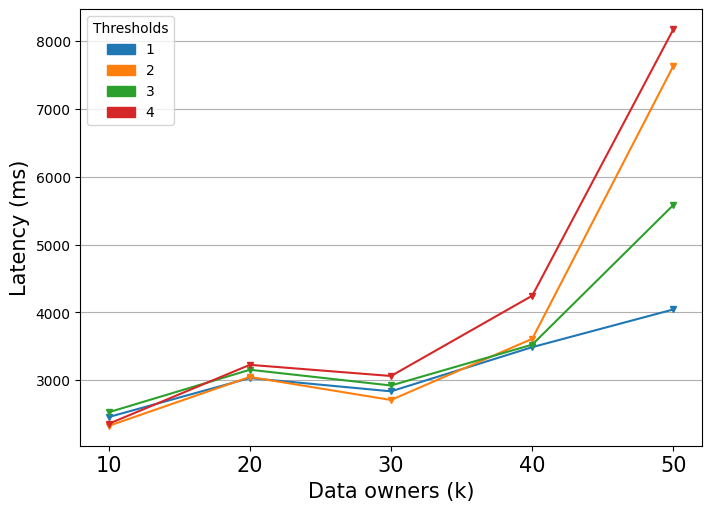

In [118]:
fig1, ax1 = plt.subplots(constrained_layout=True)
fig1.set_size_inches(7, 5)
# plt.yscale('log')
ax1.yaxis.grid(True)

colors = list(mcolors.TABLEAU_COLORS) #['tab:blue', 'tab:red', 'tab:green']

for t in range(tNum):    
    ax1.plot(positions2, latenciesPerThresh[t], 'v', linestyle='-', color=colors[t], markersize=4)

ax1.set_xticks(positions2)
ax1.set_xticklabels(labels2, fontsize=15)
ax1.set_ylabel("Latency (ms)", fontsize=15)
ax1.set_xlabel("Data owners (k)", fontsize=15)

patches = []
for i in range(tNum):    
    patches.append(mpatches.Patch(color=colors[i % tNum], label=trslds[i % tNum]))

ax1.legend(title='Thresholds', handles=patches, fontsize='medium')

plt.show()

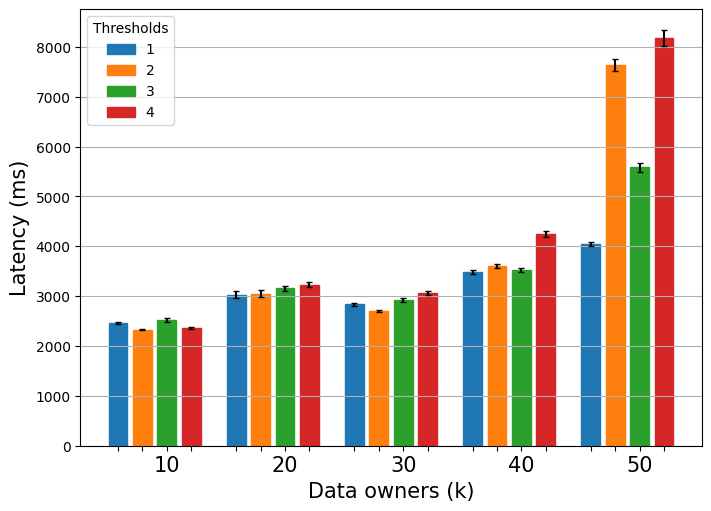

In [119]:
fig1, ax1 = plt.subplots(constrained_layout=True)
fig1.set_size_inches(7, 5)
# plt.yscale('log')
ax1.yaxis.grid(True)

bp1 = ax1.bar(positions, avg, .5, yerr=errLines,
            align='center', ecolor='black', capsize=2)

ax1.set_xticks(positions)
ax1.set_xticklabels(labels, fontsize=15)
ax1.set_ylabel("Latency (ms)", fontsize=15)
ax1.set_xlabel("Data owners (k)", fontsize=15)

colors = list(mcolors.TABLEAU_COLORS) #['tab:blue', 'tab:red', 'tab:green']
patches = []
for i, bar in enumerate(bp1):
    bar.set_color(colors[i % tNum])
for i in range(tNum):    
    patches.append(mpatches.Patch(color=colors[i % tNum], label=trslds[i % tNum]))

ax1.legend(title='Thresholds', handles=patches, fontsize='medium')

plt.show()

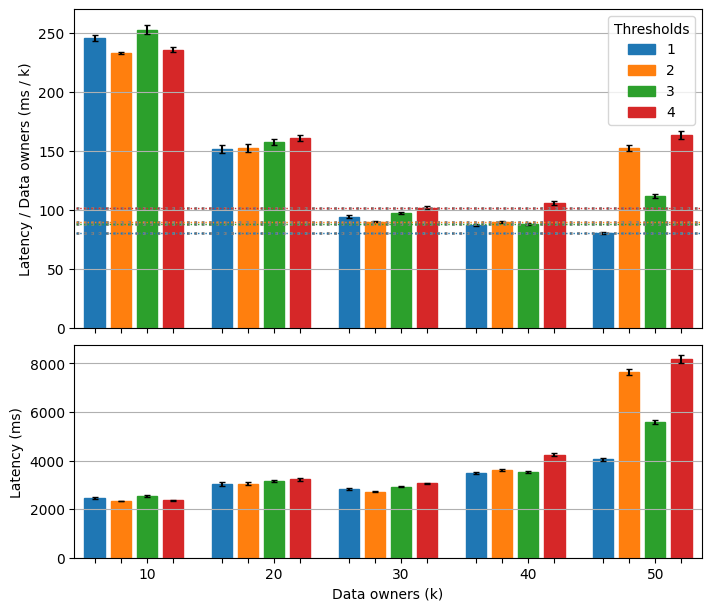

In [120]:
cycles = len(
    bobsNumberTestData[list(bobsNumberTestData.keys())[0]][0]['singleTests'][0]['bobs'][0]['requestAccess']
)
tmpqul = []
for n in nmbrs:
    for t in range(1,(tNum+1)):
        tmpqul.append(int(n))

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(7, 6), gridspec_kw={'height_ratios': [1.5, 1]}, constrained_layout=True)
fig1.set_size_inches(7, 5)
# plt.yscale('log')
axs[0].yaxis.grid(True)


bp1 = axs[0].bar(positions, avg/tmpqul, .5, yerr=errLines/tmpqul,
            align='center', ecolor='black', capsize=2)

for t in range(0,tNum):
    tmpArrMin = (avg/tmpqul)[t:len(avg/tmpqul)+1:tNum]
    axs[0].hlines(y=min(tmpArrMin), xmin=min(positions)-1, xmax=max(positions)+1, colors='gray', linestyles=':', lw=2)
    axs[0].hlines(y=min(tmpArrMin), xmin=min(positions)-1, xmax=max(positions)+1, colors=colors[t], linestyles=':', lw=1, label='ideal')
    
axs[0].set_xticks(positions)
#axs[0].set_xticklabels(labels, fontsize=15)
axs[0].set_ylabel("Latency / Data owners (ms / k)", fontsize=10)
#axs[0].set_xlabel("bobs", fontsize=15)

colors = list(mcolors.TABLEAU_COLORS) #['tab:blue', 'tab:red', 'tab:green']
patches = []
for i, bar in enumerate(bp1):
    bar.set_color(colors[i % tNum])
for i in range(tNum):    
    patches.append(mpatches.Patch(color=colors[i % tNum], label=trslds[i % tNum]))


axs[1].yaxis.grid(True)

bp2 = axs[1].bar(positions, avg, .5, yerr=errLines,
            align='center', ecolor='black', capsize=2)

axs[1].set_xticks(positions)
axs[1].set_xticklabels(labels)
axs[1].set_ylabel("Latency (ms)")
axs[1].set_xlabel("Data owners (k)")
axs[1].set_xlim([positions[0]-.5, positions[-1]+.5])

colors = list(mcolors.TABLEAU_COLORS) #['tab:blue', 'tab:red', 'tab:green']
patches = []
for i, bar in enumerate(bp2):
    bar.set_color(colors[i % tNum])
for i in range(tNum):    
    patches.append(mpatches.Patch(color=colors[i % tNum], label=trslds[i % tNum]))

axs[0].legend(title='Thresholds', handles=patches, fontsize='medium')

plt.show()

[1.1, 1.7500000000000002, 2.4, 3.05, 4.25, 4.8999999999999995, 5.549999999999999, 6.199999999999998, 7.399999999999998, 8.049999999999997, 8.699999999999998, 9.349999999999998, 10.549999999999997, 11.199999999999998, 11.849999999999998, 12.499999999999998, 13.699999999999998, 14.349999999999998, 14.999999999999998, 15.649999999999999]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.00055556 0.         0.         0.
 0.         0.         0.         0.         0.         0.00033333
 0.00066667 0.        ]


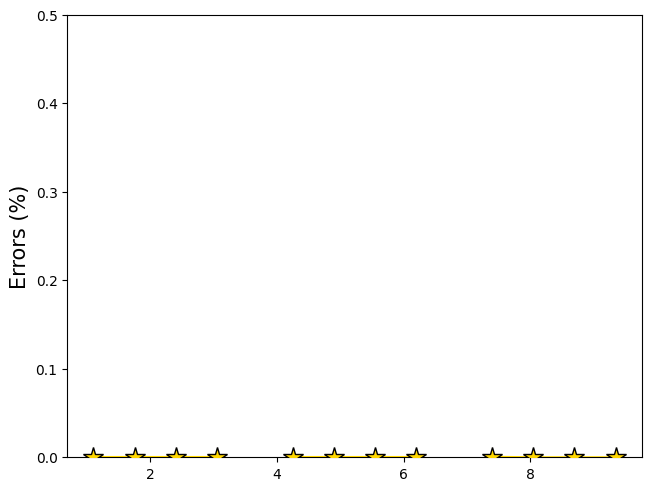

In [121]:
fig3, ax3 = plt.subplots(constrained_layout=True)
ylab2 = 'Errors (%)'
ax3.set_ylabel(ylab2, fontsize=15)
ax3.plot(positions[0:4], err[0:4], color='gold', marker='*', markeredgecolor='black', markersize=15, zorder=10)
ax3.plot(positions[4:8], err[4:8], color='gold', marker='*', markeredgecolor='black', markersize=15, zorder=10)
ax3.plot(positions[8:12], err[8:12], color='gold', marker='*', markeredgecolor='black', markersize=15, zorder=10)
ax3.set_ylim([0, 0.5])

print(positions)
print(err)

star = mlines.Line2D([], [], color='gold', marker='*', linestyle='None', markeredgecolor='black',
                     markersize=15, label='Errors')
diamond = mlines.Line2D([], [], color='w', marker='D', linestyle='None', markeredgecolor='black',
                       markersize=10, label='Averages')
plt.show()


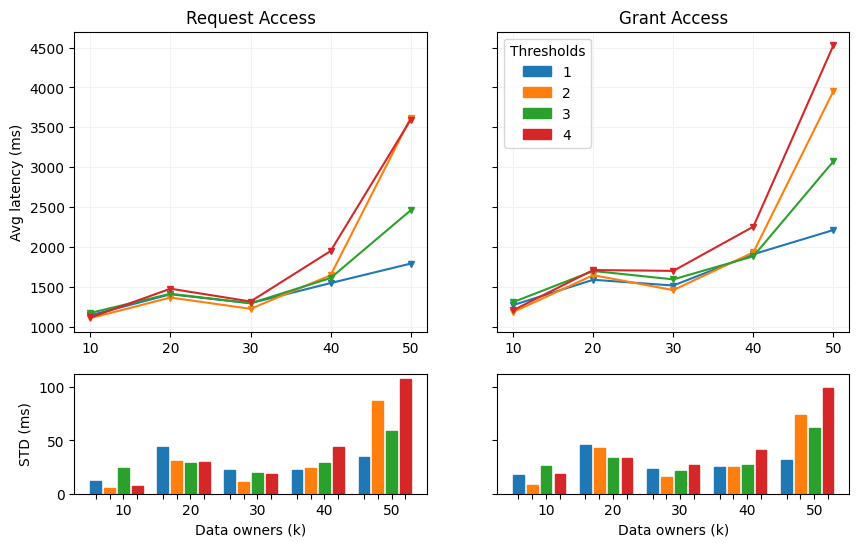

In [122]:
x_data = np.array([int(x) for x in list(bobsNumberTestData.keys())])
colors = list(mcolors.TABLEAU_COLORS) #['tab:blue', 'tab:red', 'tab:green']

fig, axs = plt.subplots(2, 2, sharey='row', figsize=(10, 6), gridspec_kw={'height_ratios': [2.5, 1], 'width_ratios': [2.5, 2.5]})

for t in range(tNum):
    bobsNumberXData = bobsNumberTestData[bobsNumber]
    tot = np.add(sdLatenciesPerThresh[t],skLatenciesPerThresh[t])
    a, b = np.polyfit(x_data, tot, deg=1)
    tot_est = a * x_data + b

    #plt.plot(x_data, tot_est, '--', color='tab:brown', alpha=0.5)
    axs[0][0].plot(x_data, sdLatenciesPerThresh[t], 'v', linestyle='-', color=colors[t], markersize=4)
    
    axs[0][1].plot(x_data, skLatenciesPerThresh[t], 'v', linestyle='-', color=colors[t], markersize=4)
    
    #plt.plot(x_data, tot, 's', linestyle="--", color=colors[t], label='total')

patches = []

    
justTmp = [sdErrLines, skErrLines]
for i in range(0,2):
    bp1 = axs[1][i].bar(positions, justTmp[i], .5, align='center')
    axs[1][i].set_xticks(positions)
    axs[1][i].set_xticklabels(labels)
    for j, bar in enumerate(bp1):
        bar.set_color(colors[j % tNum])
    
axs[0][0].set_ylabel('Avg latency (ms)')
axs[1][0].set_ylabel('STD (ms)')
axs[1][0].set_xlabel('Data owners (k)')
axs[1][1].set_xlabel('Data owners (k)')
axs[0][0].set_title('Request Access')
axs[0][1].set_title('Grant Access')
axs[0][0].grid(color='0.95')
axs[0][1].grid(color='0.95')

patches = []
for i in range(tNum):    
    patches.append(mpatches.Patch(color=colors[i % tNum], label=trslds[i % tNum]))
axs[0][1].legend(title='Thresholds', handles=patches)

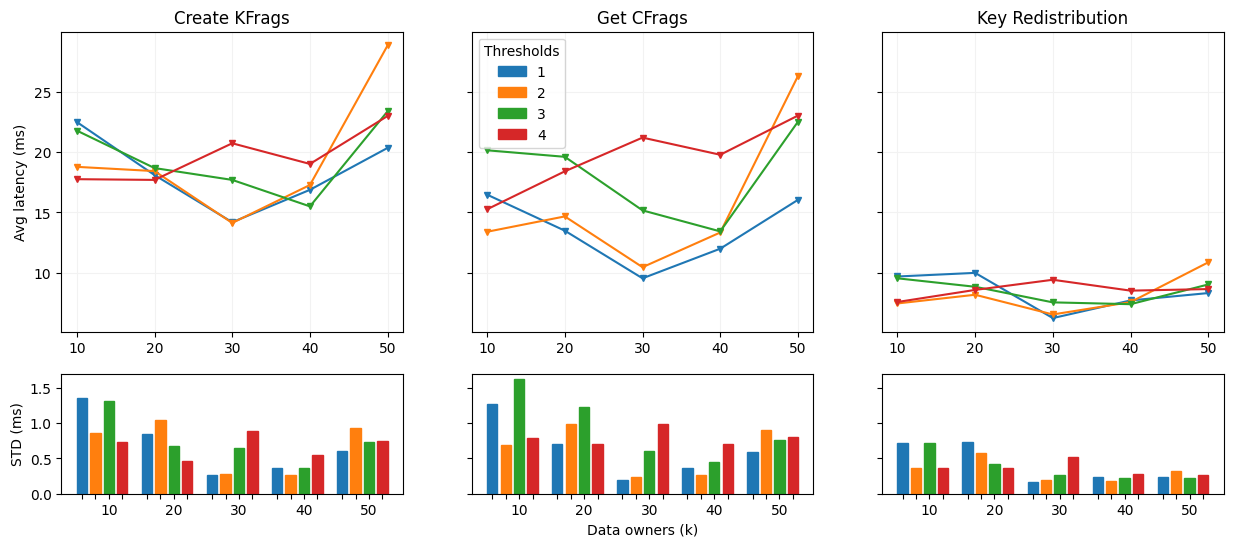

In [123]:
x_data = np.array([int(x) for x in list(bobsNumberTestData.keys())])
colors = list(mcolors.TABLEAU_COLORS) #['tab:blue', 'tab:red', 'tab:green']

fig, axs = plt.subplots(2, 3, sharey='row', figsize=(15, 6), gridspec_kw={'height_ratios': [2.5, 1], 'width_ratios': [1, 1, 1]})

for t in range(tNum):
    bobsNumberXData = bobsNumberTestData[bobsNumber]
    tot = np.add(np.add(ckLatenciesPerThresh[t],gcLatenciesPerThresh[t]),krLatenciesPerThresh[t])
    a, b = np.polyfit(x_data, tot, deg=1)
    tot_est = a * x_data + b

    #plt.plot(x_data, tot_est, '--', color='tab:brown', alpha=0.5)
    axs[0][0].plot(x_data, ckLatenciesPerThresh[t], 'v', linestyle='-', color=colors[t], markersize=4)

    axs[0][1].plot(x_data, gcLatenciesPerThresh[t], 'v', linestyle='-', color=colors[t], markersize=4)

    axs[0][2].plot(x_data, krLatenciesPerThresh[t], 'v', linestyle='-', color=colors[t], markersize=4)
    
    #plt.plot(x_data, tot, 's', linestyle="--", color=colors[t], label='total')

patches = []

    
justTmp = [ckErrLines, gcErrLines, krErrLines]
for i in range(0,3):
    bp1 = axs[1][i].bar(positions, justTmp[i], .5, align='center')
    axs[1][i].set_xticks(positions)
    axs[1][i].set_xticklabels(labels)
    for j, bar in enumerate(bp1):
        bar.set_color(colors[j % tNum])
    
axs[0][0].set_ylabel('Avg latency (ms)')
axs[1][0].set_ylabel('STD (ms)')
axs[1][1].set_xlabel('Data owners (k)')
axs[0][0].set_title('Create KFrags')
axs[0][1].set_title('Get CFrags')
axs[0][2].set_title('Key Redistribution')
axs[0][0].grid(color='0.95')
axs[0][1].grid(color='0.95')
axs[0][2].grid(color='0.95')

patches = []
for i in range(tNum):    
    patches.append(mpatches.Patch(color=colors[i % tNum], label=trslds[i % tNum]))
axs[0][1].legend(title='Thresholds', handles=patches)

In [124]:
matrx = []
for bobsNumber in bobsNumberTestData:
    bobsNumberXData = bobsNumberTestData[bobsNumber]
    mulNum = 0
    matrixThreshold = []
    for thresholdXData in bobsNumberXData:
        print(thresholdXData['bobsNumber'], " - ", thresholdXData['thresholdNumber'])
        matrixTests = []
        for textXData in thresholdXData['singleTests']:
            matrixBobs = []
            for bobXData in textXData['bobs']:
                tmpSD = np.array(bobXData['requestAccess'])
                tmpSK = np.array(bobXData['grantAccess'])
                tmpCK = np.array(bobXData['createKfrags'])
                tmpGC = np.array(bobXData['getCfrags'])
                tmpKR = np.array(bobXData['keyRedistribution'])
                tmpTot = tmpSD + tmpSK + tmpCK + tmpGC + tmpKR
                matrixBobs.append(tmpTot)
            matrixTests.append(np.mean(matrixBobs, axis=0))  
        matrixThreshold.append(np.mean(matrixTests, axis=0))
    matrx.append(matrixThreshold)
avgLatencyPerCycle = np.mean(matrx, axis=0)
matrxT1 = matrx.copy()
for i, row in enumerate(matrxT1):
    matrxT1[i] = row[0]
matrxT2 = matrx.copy()
for i, row in enumerate(matrxT2):
    matrxT2[i] = row[1]
matrxT3 = matrx.copy()
for i, row in enumerate(matrxT3):
    matrxT3[i] = row[2]
matrxT4 = matrx.copy()
for i, row in enumerate(matrxT4):
    matrxT4[i] = row[3]

10  -  1
10  -  2
10  -  3
10  -  4
20  -  1
20  -  2
20  -  3
20  -  4
30  -  1


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (30,) + inhomogeneous part.

Text(0.5, 1.0, 'Threshold 4')

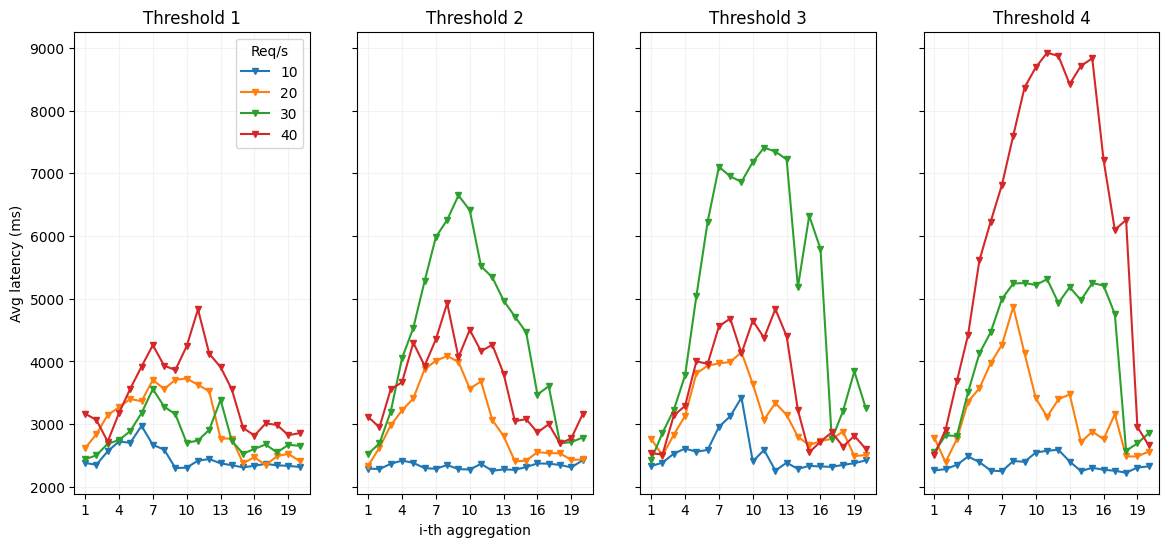

In [ ]:
colors = list(mcolors.TABLEAU_COLORS).copy() #['tab:blue', 'tab:red', 'tab:green']

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(14, 6))

bobsNumberStrTmp = list(bobsNumberTestData.keys())

for c in range(len(matrxT1)):
    if not False:#c % 2:
        axs[0].plot(range(1,21), matrxT1[c], 'v', linestyle='-', color=colors[c], label=bobsNumberStrTmp[c], markersize=4)
        axs[1].plot(range(1,21),matrxT2[c], 'v', linestyle='-', color=colors[c], markersize=4)
        axs[2].plot(range(1,21),matrxT3[c], 'v', linestyle='-', color=colors[c], markersize=4)
        axs[3].plot(range(1,21),matrxT4[c], 'v', linestyle='-', color=colors[c], markersize=4)
        axs[0].set_xticks(range(1,21,3))
        axs[0].grid(color='0.95')
        axs[1].set_xticks(range(1,21,3))
        axs[1].grid(color='0.95')
        axs[2].set_xticks(range(1,21,3))
        axs[2].grid(color='0.95')
        axs[3].set_xticks(range(1,21,3))
        axs[3].grid(color='0.95')

axs[0].legend(title='Req/s')  
axs[0].set_ylabel('Avg latency (ms)')
axs[1].set_xlabel('i-th aggregation')
axs[0].set_title('Threshold 1')
axs[1].set_title('Threshold 2')
axs[2].set_title('Threshold 3')
axs[3].set_title('Threshold 4')


In [ ]:
kfragsData = {'x':[], 'tot':[]} 
payloadData = {'x':[], 'enc':[], 'dec':[]} 
path = os.walk(startingDirRust)
startDir = next(path)
for file in startDir[2]:
    with open(startingDirRust + '/' + file, 'r') as singleBobCSV:
        reader = csv.reader(singleBobCSV)
        columns = next(reader)
        if 'NodesNum' in columns:
            for row in reader:
                kfragsData['x'].append(int(row[0]))
                kfragsData['tot'].append(int(row[2]))
        else:
            for row in reader:
                payloadData['x'].append(int(row[0]))
                payloadData['enc'].append(int(row[1]))
                payloadData['dec'].append(int(row[2]))

StopIteration: 

/var/folders/rz/prz6_xfx20sgd1hlsxhn351w0000gn/T/ipykernel_84712/3455912898.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(['10B', '50B', '100B', '500B', '1KB', '5KB', '10KB', '50KB', '100KB', '500KB', '1MB', '5MB', '10MB'])


Text(0.5, 0, 'Payload Size (Bytes)')

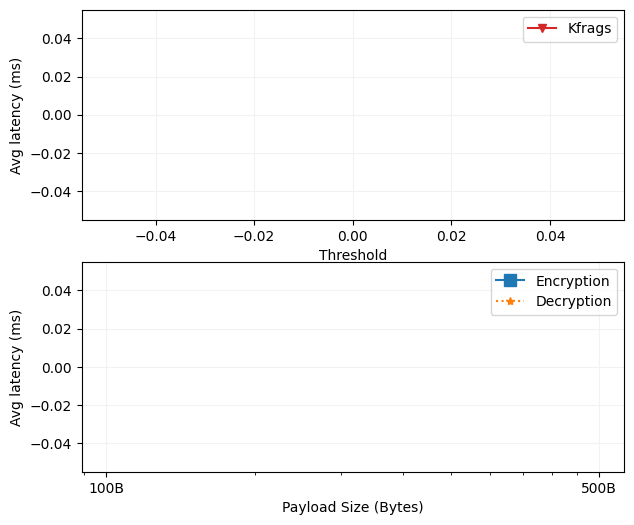

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6))

axs[0].plot(kfragsData['x'], kfragsData['tot'], 'v', linestyle='-', color=colors[3], label='Kfrags', markersize=6)
axs[1].plot(payloadData['x'], payloadData['enc'], 's', linestyle='-', color=colors[0], label='Encryption', markersize=8)
axs[1].plot(payloadData['x'], payloadData['dec'], '*', linestyle=':', color=colors[1], label='Decryption', markersize=6)
#axs[0].set_xticks(range(1,11,3))
axs[0].grid(color='0.95')
#axs[1].set_xticks(range(1,11,3))
axs[1].grid(color='0.95')
axs[1].set_xscale('log')

axs[1].set_xticklabels(['10B', '50B', '100B', '500B', '1KB', '5KB', '10KB', '50KB', '100KB', '500KB', '1MB', '5MB', '10MB'])
axs[0].legend(title='')
axs[0].set_ylabel('Avg latency (ms)')
axs[0].set_xlabel('Threshold')
axs[1].legend(title='')
axs[1].set_ylabel('Avg latency (ms)')
axs[1].set_xlabel('Payload Size (Bytes)')